# PyLASCA
a tool for ...

## Detailed Area Alignment
Analyse and compare areas of LaSCA and mechanical pain detection

by

Sebastian Malkusch

2020-06-16

Institute for clinical pharmacology,

data science division,

Goethe-University Frankfurt,

Germany

malkusch@med.uni-frankfurt.de

www.smb.uni-frankfurt.de

http://share.smb.uni-frankfurt.de

## Import Libraries

In [1]:
import pandas as pd
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from pyLASCA.source import fileNames
from pyLASCA.source import loss
from pyLASCA.source import roiContour

## Define Filenames

In [2]:
imgName = "/Users/malkusch/PowerFolders/LaSCA/rawData/SCTCAPS01/SCTCAPS01_1.15_frame0.tiff"
coordName = "/Users/malkusch/PowerFolders/LaSCA/mechanic/SCTCAPS 01/Tag 1/SCTCAPS 01 #1 15min (Colour)_transformed_200612.csv"

## Load Files

In [3]:
img1 = cv.imread(imgName, cv.IMREAD_ANYDEPTH)
df_coord = pd.read_csv(coordName)

## User Definitions

In [4]:
#effect = "sec_hyperalgesia"
effect = "allodynia"
df_coord = df_coord[df_coord["effect"] == effect]
contour_usr = np.zeros([len(df_coord),1,2], dtype = int)
contour_usr[:,0,0] = np.round(df_coord["x_img_[pxl]"].values).astype(int)
contour_usr[:,0,1] = np.round(df_coord["y_img_[pxl]"].values).astype(int)

## Run Analysis

In [5]:
roi_thr = roiContour.RoiContour()
    
roi_usr = roiContour.RoiContour()
roi_usr.image_raw = img1
roi_usr.contour = contour_usr
roi_usr.analyze_roi()

loss = loss.Loss(obj = roi_usr)
loss.minimize_brute()

/Users/malkusch/opt/anaconda3/lib/python3.7/site-packages/scipy/ndimage/measurements.py:1386: RuntimeWarning: invalid value encountered in true_divide
  for dir in range(input.ndim)]


## Plot Results

### normalized root mean squared error (nrmse)

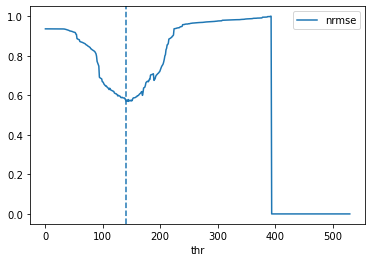

In [6]:
loss.df_metrics.plot(x="thr", y="nrmse", kind = "line")
plt.axvline(x= loss.thr_abs, linestyle='dashed', label = 'threshold')
plt.show()
plt.close()

### peak-signal-to-noise ratio (psnr)

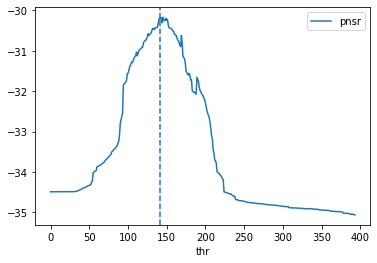

In [7]:
loss.df_metrics.plot(x="thr", y="pnsr", kind = "line")
plt.axvline(x= loss.thr_abs, linestyle='dashed', label = 'threshold')
plt.show()
plt.close()

### structural similarity index measure (ssim)

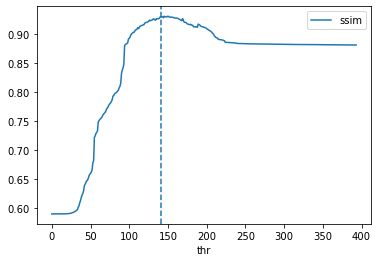

In [8]:
loss.df_metrics.plot(x="thr", y="ssim", kind = "line")
plt.axvline(x= loss.thr_abs, linestyle='dashed', label = 'threshold')
plt.show()
plt.close()

### area agreement ratio

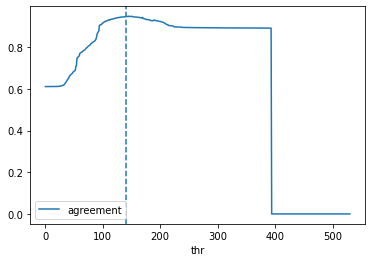

In [9]:
loss.df_metrics.plot(x="thr", y="agreement", kind = "line")
plt.axvline(x= loss.thr_abs, linestyle='dashed', label = 'threshold')
plt.show()
plt.close()

### non overlapping area ratio

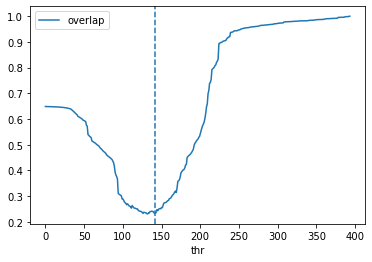

In [10]:
loss.df_metrics.plot(x="thr", y="overlap", kind = "line")
plt.axvline(x= loss.thr_abs, linestyle='dashed', label = 'threshold')
plt.show()
plt.close()

### Distance

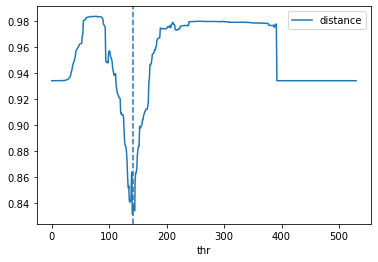

In [11]:
loss.df_metrics.plot(x="thr", y="distance", kind = "line")
plt.axvline(x= loss.thr_abs, linestyle='dashed', label = 'threshold')
plt.show()
plt.close()

### loss function

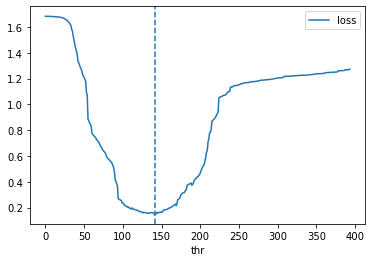

In [12]:
loss.plot_minimization_process()

### Final Result

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


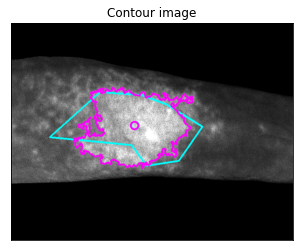

The optimal intensity threshold is determined to be: 141


In [13]:
loss.plot_result()
print("The optimal intensity threshold is determined to be: %i" %(loss.thr_abs))

/Users/malkusch/opt/anaconda3/lib/python3.7/site-packages/scipy/ndimage/measurements.py:1386: RuntimeWarning: invalid value encountered in true_divide
  for dir in range(input.ndim)]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


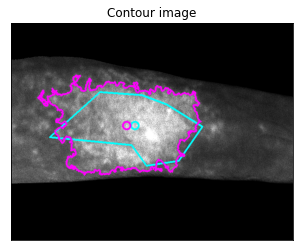

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


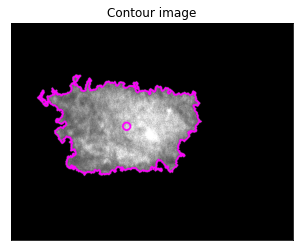

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Instance of RoiContour removed form heap


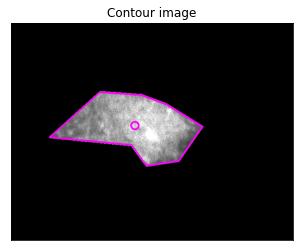

Instance of RoiContour removed form heap


In [14]:
loss.loss_function(thr=[100])
loss.plot_result()
loss.roi_thr.contourImage()
loss.roi_usr.contourImage()